In [1]:
from pymatgen.io.vasp import Xdatcar
import numpy as np

from polyhedral_analysis.trajectory import Trajectory
from polyhedral_analysis.polyhedra_recipe import PolyhedraRecipe, create_matching_site_generator
from polyhedral_analysis.rotation_analyser import RotationAnalyser

import matplotlib.pyplot as plt
import tqdm


In [2]:
ps4_recipe = PolyhedraRecipe(central_atoms='P', vertex_atoms='S', method='nearest neighbours',
                            n_neighbours=4)
sns4_recipe = PolyhedraRecipe(central_atoms='Sn', vertex_atoms='S', method='nearest neighbours',
                             n_neighbours=4)

In [3]:
trajectory = Trajectory.from_xdatcars( filenames=['matt_check/XDATCAR'], 
                                       recipes=[ps4_recipe, sns4_recipe], 
                                       progress='notebook',
                                       ncores=4 )

In [13]:
len(trajectory.configurations)

2000

In [14]:
len(trajectory.configurations[0].polyhedra)

24

In [6]:
from collections import Counter
for i, c in enumerate(trajectory.configurations):
    print( i, Counter([p.coordination_number for p in c.polyhedra]))

0 Counter({4: 24})
1 Counter({4: 24})
2 Counter({4: 24})
3 Counter({4: 24})
4 Counter({4: 24})
5 Counter({4: 24})
6 Counter({4: 24})
7 Counter({4: 24})
8 Counter({4: 24})
9 Counter({4: 24})
10 Counter({4: 24})
11 Counter({4: 24})
12 Counter({4: 24})
13 Counter({4: 24})
14 Counter({4: 24})
15 Counter({4: 24})
16 Counter({4: 24})
17 Counter({4: 24})
18 Counter({4: 24})
19 Counter({4: 24})
20 Counter({4: 24})
21 Counter({4: 24})
22 Counter({4: 24})
23 Counter({4: 24})
24 Counter({4: 24})
25 Counter({4: 24})
26 Counter({4: 24})
27 Counter({4: 24})
28 Counter({4: 24})
29 Counter({4: 24})
30 Counter({4: 24})
31 Counter({4: 24})
32 Counter({4: 24})
33 Counter({4: 24})
34 Counter({4: 24})
35 Counter({4: 24})
36 Counter({4: 24})
37 Counter({4: 24})
38 Counter({4: 24})
39 Counter({4: 24})
40 Counter({4: 24})
41 Counter({4: 24})
42 Counter({4: 24})
43 Counter({4: 24})
44 Counter({4: 24})
45 Counter({4: 24})
46 Counter({4: 24})
47 Counter({4: 24})
48 Counter({4: 24})
49 Counter({4: 24})
50 Counter

1258 Counter({4: 24})
1259 Counter({4: 24})
1260 Counter({4: 24})
1261 Counter({4: 24})
1262 Counter({4: 24})
1263 Counter({4: 24})
1264 Counter({4: 24})
1265 Counter({4: 24})
1266 Counter({4: 24})
1267 Counter({4: 24})
1268 Counter({4: 24})
1269 Counter({4: 24})
1270 Counter({4: 24})
1271 Counter({4: 24})
1272 Counter({4: 24})
1273 Counter({4: 24})
1274 Counter({4: 24})
1275 Counter({4: 24})
1276 Counter({4: 24})
1277 Counter({4: 24})
1278 Counter({4: 24})
1279 Counter({4: 24})
1280 Counter({4: 24})
1281 Counter({4: 24})
1282 Counter({4: 24})
1283 Counter({4: 24})
1284 Counter({4: 24})
1285 Counter({4: 24})
1286 Counter({4: 24})
1287 Counter({4: 24})
1288 Counter({4: 24})
1289 Counter({4: 24})
1290 Counter({4: 24})
1291 Counter({4: 24})
1292 Counter({4: 24})
1293 Counter({4: 24})
1294 Counter({4: 24})
1295 Counter({4: 24})
1296 Counter({4: 24})
1297 Counter({4: 24})
1298 Counter({4: 24})
1299 Counter({4: 24})
1300 Counter({4: 24})
1301 Counter({4: 24})
1302 Counter({4: 24})
1303 Count

In [15]:
reference_points = np.array([[1.0, -1.0, 1.0],
                             [-1.0, -1.0, -1.0],
                             [1.0, 1.0, -1.0],
                             [-1.0, 1.0, 1.0]])
reference_points.shape

(4, 3)

In [16]:
ra = RotationAnalyser(reference_points=reference_points)

In [22]:
poly = trajectory.configurations[0].polyhedra[10]
poly

Coordination Polyhedron Sn
90 [ 3.23857951 13.38837948 20.00079752] Sn
----------
137 [ 1.87366923 11.83005494 21.54301105] S

138 [ 1.52053892  1.16677769 18.84533485] S

157 [ 4.43912686  1.5245081  21.11391182] S

159 [ 4.50767108 12.12906673 18.59083397] S


In [20]:
ra.polyhedron_orientation(poly)

{'orientation_index': 7,
 'rotational_distance': 1.3468537024106195,
 'symmetry_measure': 0.7823873171967773}

In [8]:
all_points = np.array([reference_points, reference_points*(-1)])
all_points.shape

(2, 4, 3)

In [9]:
reference_points = np.array([[1.0, -1.0, 1.0],
                             [-1.0, -1.0, -1.0],
                             [1.0, 1.0, -1.0],
                             [-1.0, 1.0, 1.0]])

ra = RotationAnalyser(reference_points=all_points)

In [10]:
# new method
import math

n = len(trajectory.configurations[0].polyhedra)
# n = 2
all_orientations = []
all_angles = []
for i in tqdm.tqdm_notebook(range(n), unit='polyhedra'):
    angles = []
    orientations = []
    for c in tqdm.tqdm_notebook(trajectory.configurations, leave=False, unit='configurations'):
        po = ra.polyhedron_orientation( c.polyhedra[i] )
        angles.append(po['rotational_distance'])
        orientations.append(po['orientation_index'])
    all_orientations.append(orientations)
    all_angles.append(angles)
all_orientations = np.array(all_orientations)
all_angles = np.array(all_angles)*180.0/math.pi

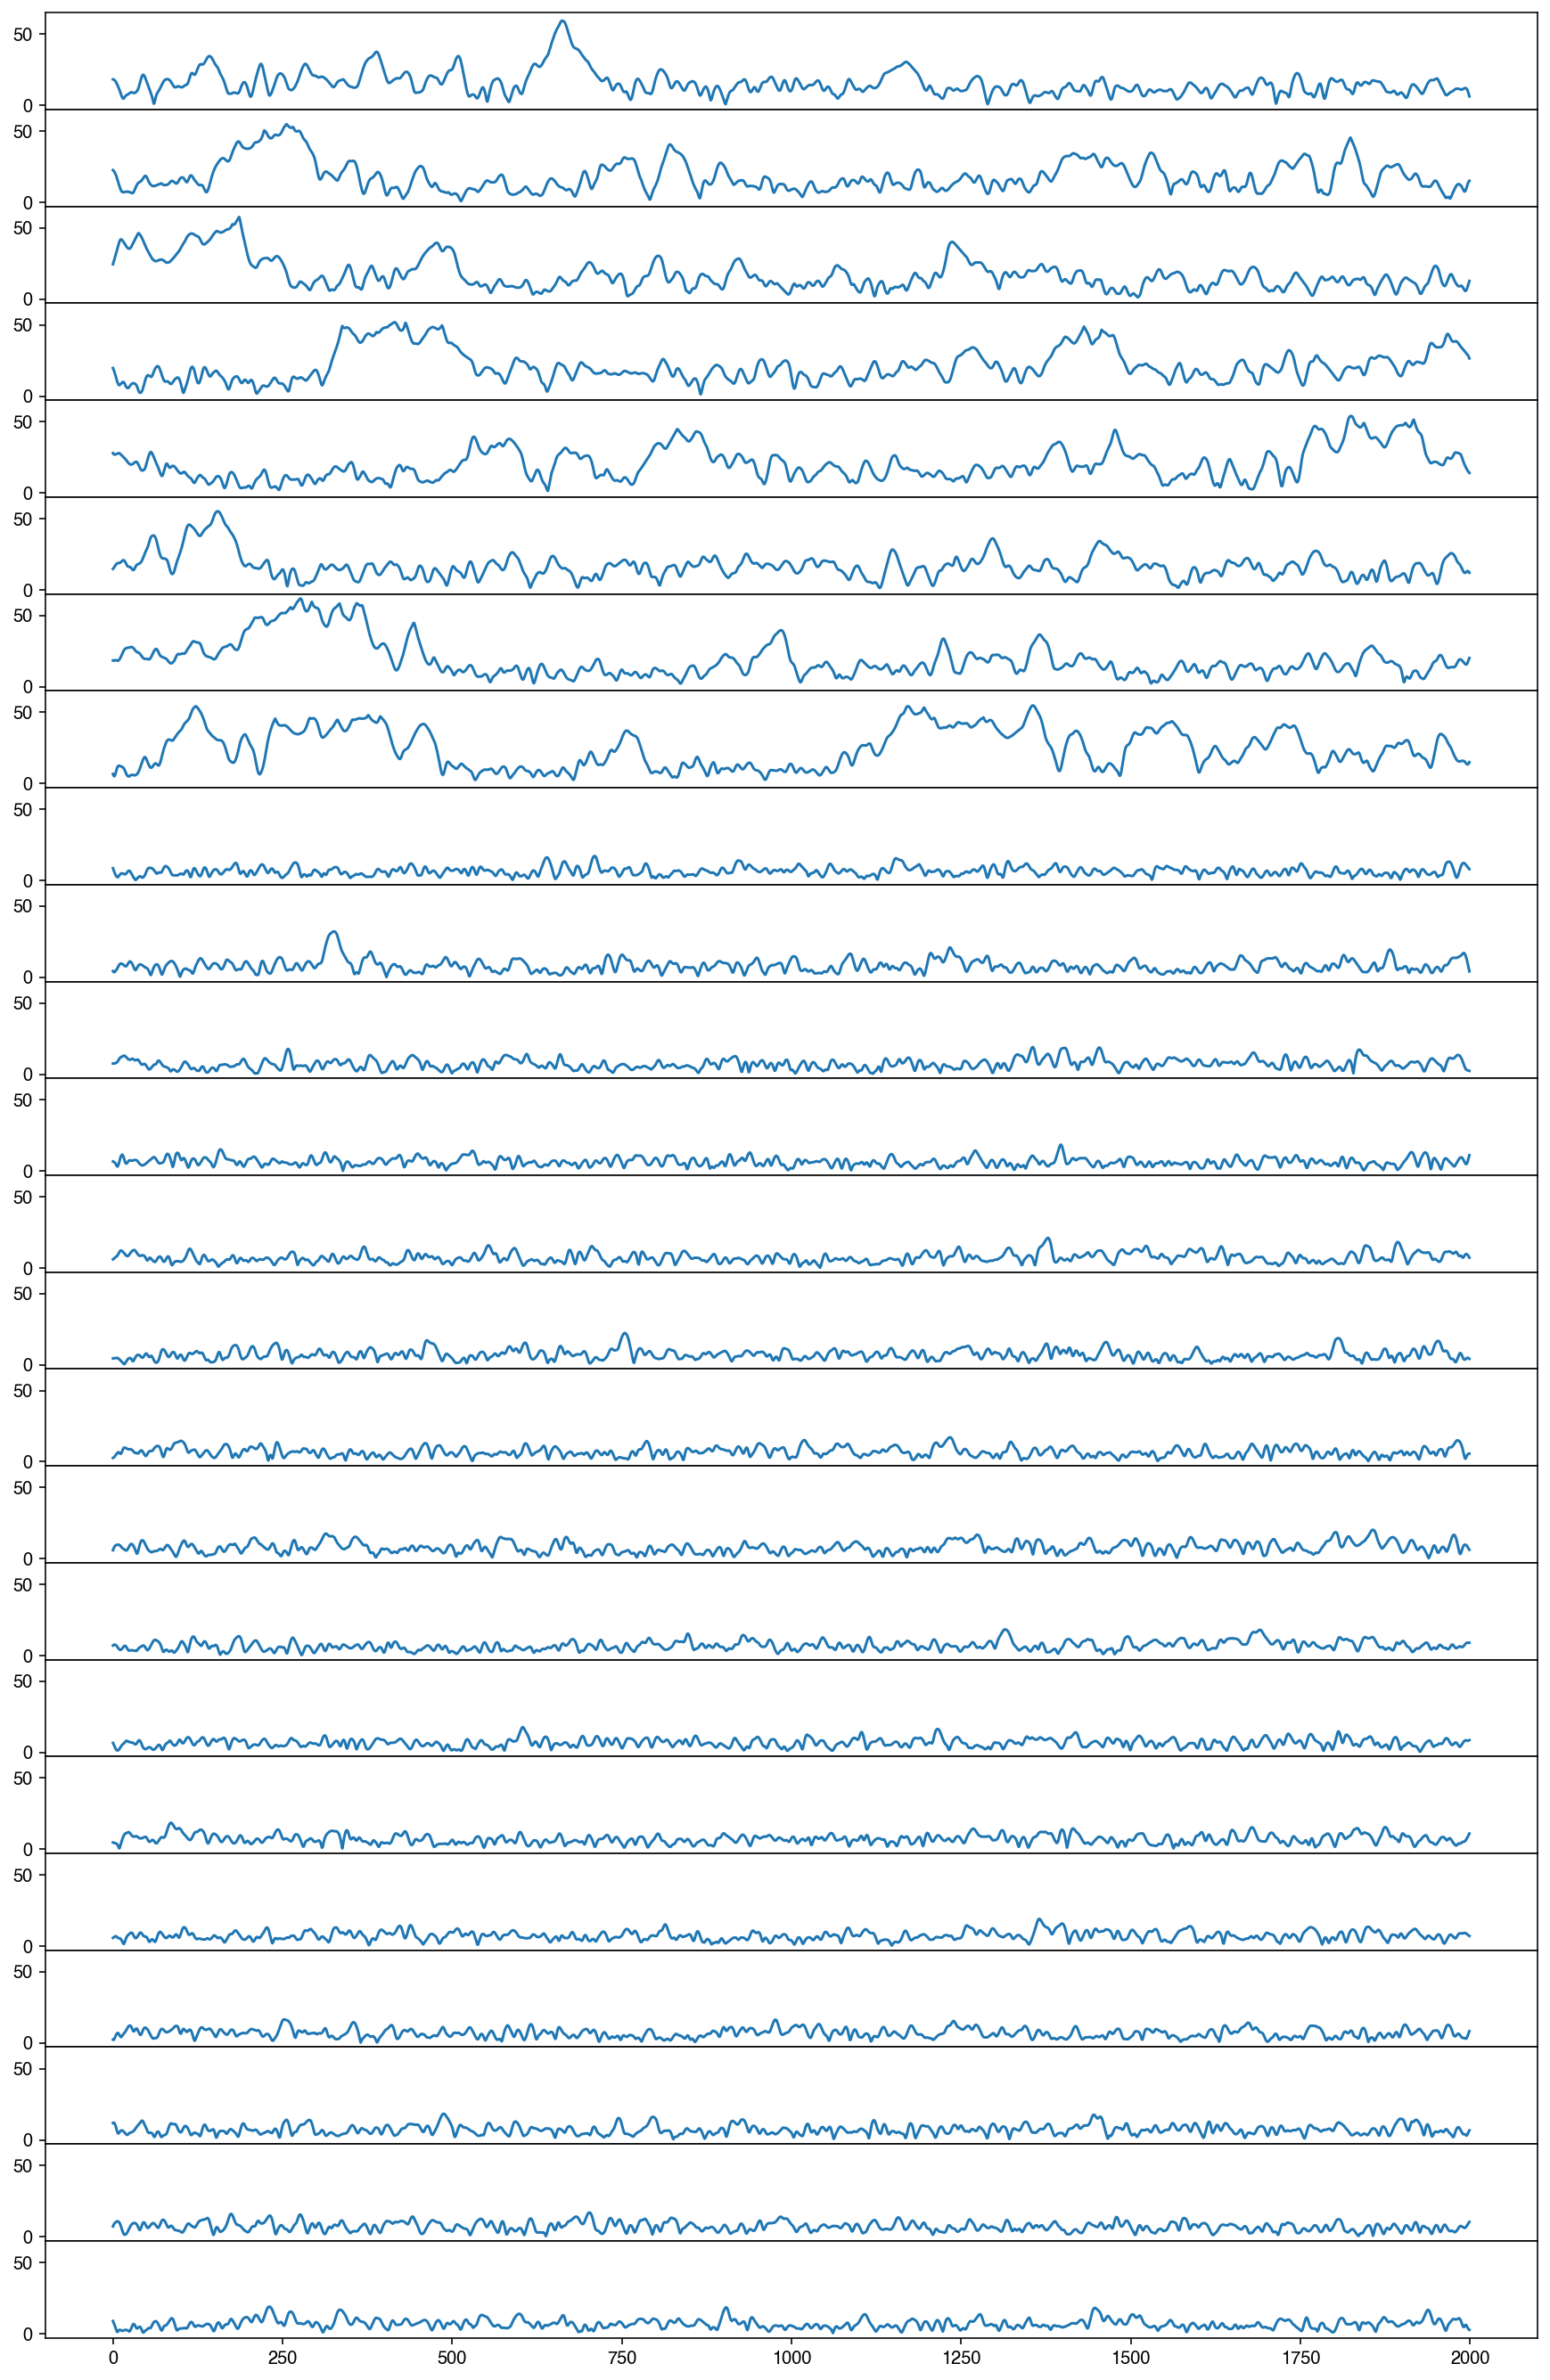

In [11]:
f, ax = plt.subplots(n, 1, sharey=True, figsize=(15,n), gridspec_kw={'hspace': 0})
for axis, angles in zip(ax, all_angles):
    axis.plot(angles)
plt.show()

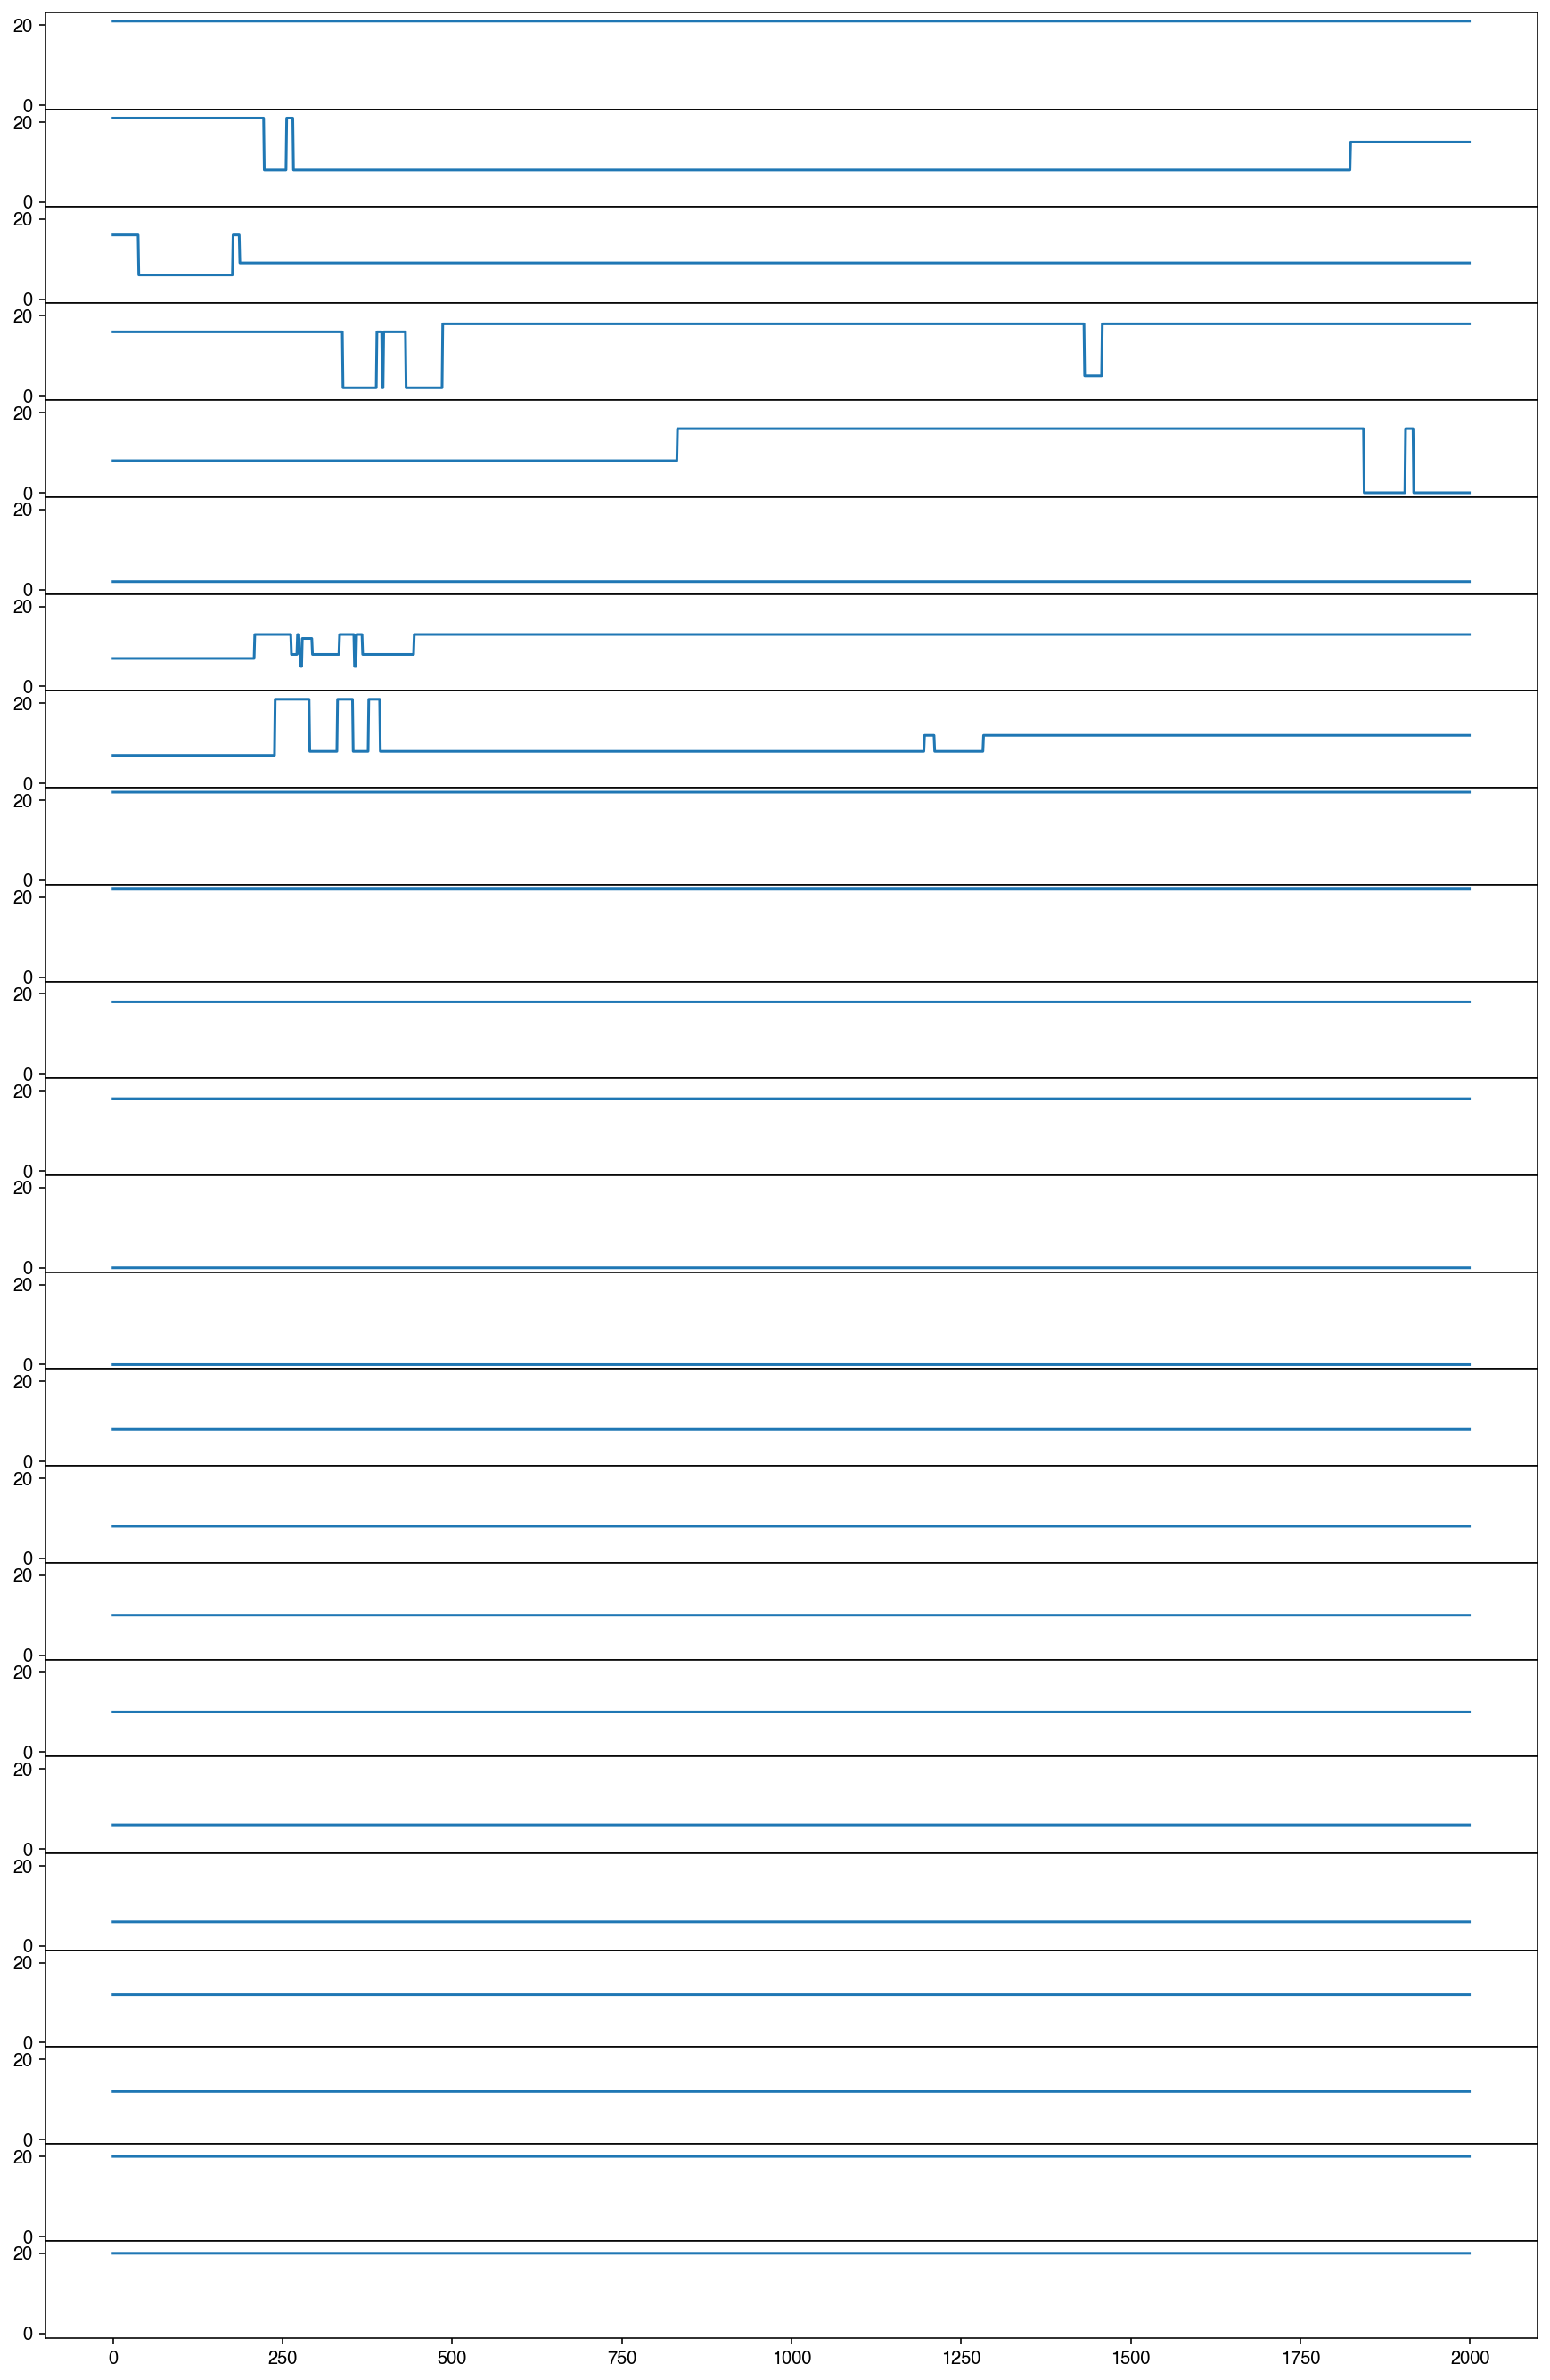

In [24]:
f, ax = plt.subplots(n, 1, sharey=True, figsize=(15,n), gridspec_kw={'hspace': 0})
for axis, o in zip(ax, all_orientations):
#     axis.plot(np.not_equal(o[:-1],o[1:]), 'o')
    axis.plot(o)
plt.show()